# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + f"&q={city}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["coord"]["lon"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salisbury
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hualmay
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | burnie
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | eganville
Processing Record 22 of Set 1 | strezh

Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | flinders
Processing Record 43 of Set 4 | riyadh
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | trinidad
Processing Record 46 of Set 4 | mokokchung
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | naze
Processing Record 0 of Set 5 | honiara
Processing Record 1 of Set 5 | castro
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | tahta
Processing Record 5 of Set 5 | nicoya
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | iquitos
Processing Record 8 of Set 5 | manzil tamim
City not found. Skipping...
Processing Record 9 of Set 5 | roebourne
Processing Record 10 of Set 5 | kaitangata
Processing Record 11 of Set 5 | etaples
Processing Record 

Processing Record 25 of Set 8 | tocopilla
Processing Record 26 of Set 8 | peringat
Processing Record 27 of Set 8 | mwanza
Processing Record 28 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 29 of Set 8 | halalo
City not found. Skipping...
Processing Record 30 of Set 8 | puksoozero
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | zamora
Processing Record 34 of Set 8 | xining
Processing Record 35 of Set 8 | mandalgovi
Processing Record 36 of Set 8 | el tigre
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | turan
Processing Record 39 of Set 8 | casper
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | tidore
City not found. Skipping...
Processing Record 43 of Set 8 | troitskoye
Processing Record 44 of Set 8 | kainantu
Processing Record 45 of Set 8 | jobabo
Processing Reco

Processing Record 12 of Set 12 | ballina
Processing Record 13 of Set 12 | gat
Processing Record 14 of Set 12 | iranshahr
Processing Record 15 of Set 12 | fresno
Processing Record 16 of Set 12 | colac
Processing Record 17 of Set 12 | maragogipe
Processing Record 18 of Set 12 | nchelenge
Processing Record 19 of Set 12 | palana
Processing Record 20 of Set 12 | mbulu
Processing Record 21 of Set 12 | kalianget
Processing Record 22 of Set 12 | mamurras
Processing Record 23 of Set 12 | bandarbeyla
Processing Record 24 of Set 12 | bentiu
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | qandahar
City not found. Skipping...
Processing Record 27 of Set 12 | imabari
City not found. Skipping...
Processing Record 28 of Set 12 | trairi
Processing Record 29 of Set 12 | loiza
Processing Record 30 of Set 12 | kantunilkin
Processing Record 31 of Set 12 | alotau
City not found. Skipping...
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | maneadero


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salisbury,51.0693,-1.7957,-1.7957,82,100,6.17,GB,1674755523
1,busselton,-33.6500,115.3333,115.3333,91,100,2.82,AU,1674755806
2,mehamn,71.0357,27.8492,27.8492,69,75,10.29,NO,1674755806
3,tuktoyaktuk,69.4541,-133.0374,-133.0374,75,20,1.54,CA,1674755806
4,ribeira grande,38.5167,-28.7000,-28.7000,63,20,11.32,PT,1674755807
...,...,...,...,...,...,...,...,...,...
570,luzhou,28.8724,105.4405,105.4405,74,100,1.50,CN,1674756043
571,plainview,40.7765,-73.4673,-73.4673,62,100,9.26,US,1674756044
572,kijang,35.2442,129.2139,129.2139,60,100,2.65,KR,1674756044
573,menongue,-14.6585,17.6910,17.6910,88,73,0.91,AO,1674756044


In [5]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salisbury,51.0693,-1.7957,-1.7957,82,100,6.17,GB,1674755523
1,busselton,-33.6500,115.3333,115.3333,91,100,2.82,AU,1674755806
2,mehamn,71.0357,27.8492,27.8492,69,75,10.29,NO,1674755806
3,tuktoyaktuk,69.4541,-133.0374,-133.0374,75,20,1.54,CA,1674755806
4,ribeira grande,38.5167,-28.7000,-28.7000,63,20,11.32,PT,1674755807


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data_file.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salisbury,51.0693,-1.7957,-1.7957,82,100,6.17,GB,1674755523
1,busselton,-33.6500,115.3333,115.3333,91,100,2.82,AU,1674755806
2,mehamn,71.0357,27.8492,27.8492,69,75,10.29,NO,1674755806
3,tuktoyaktuk,69.4541,-133.0374,-133.0374,75,20,1.54,CA,1674755806
4,ribeira grande,38.5167,-28.7000,-28.7000,63,20,11.32,PT,1674755807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

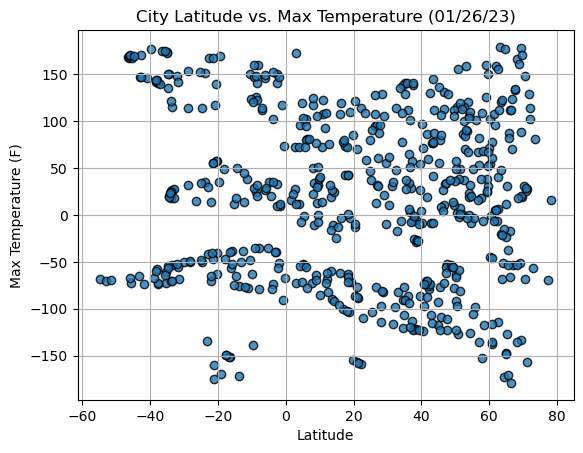

In [8]:
# Build scatter plot for latitude vs. temperature
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
           city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

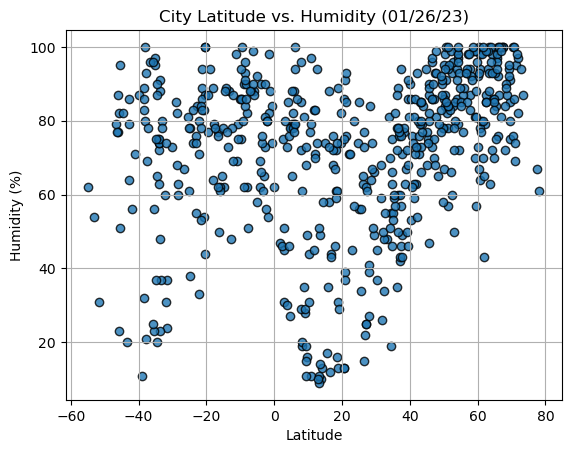

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

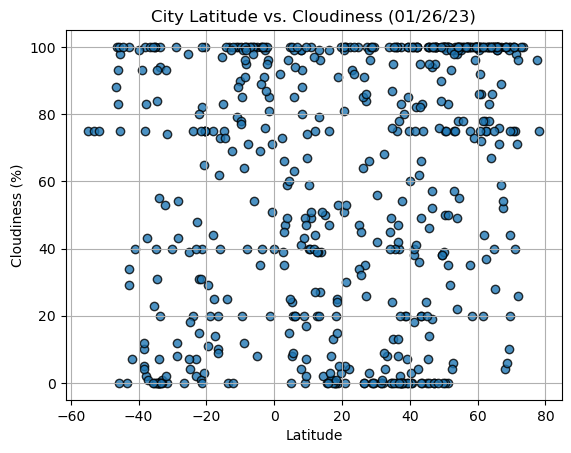

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

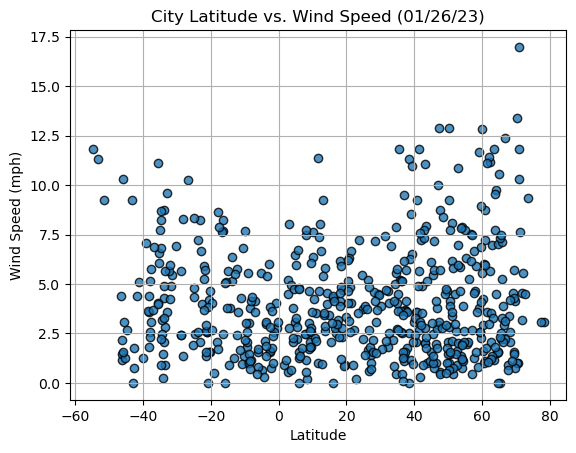

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#scipy.stats.linregress


###  Temperature vs. Latitude Linear Regression Plot

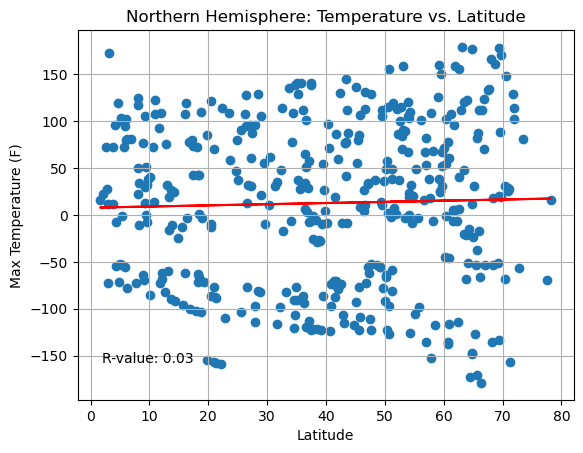

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the northern hemisphere data
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Create a DataFrame from the northern hemisphere data
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')

# Show the plot
plt.show()

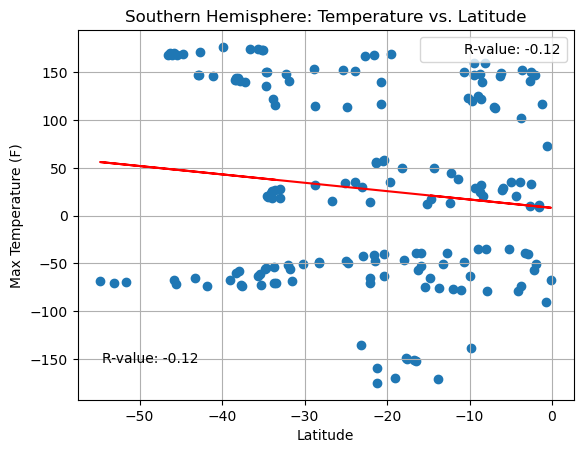

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the northern hemisphere data
southern_hemisphere = [city for city in city_data if city["Lat"] <= 0]

# Create a DataFrame from the northern hemisphere data
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)


# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


# Show the plot
plt.show()

**Discussion about the linear relationship:** The correlation direction is different: The correlation coefficient is positive in the southern hemisphere and negative in the northern hemisphere, indicating a different relationship between temperature and latitude in the two hemispheres. In the southern hemisphere, temperature tends to increase as latitude increases, but in the northern hemisphere, temperature tends to decrease as latitude increases. This difference could be caused by ocean currents, atmospheric circulation patterns, and the amount of solar radiation received.

### Humidity vs. Latitude Linear Regression Plot

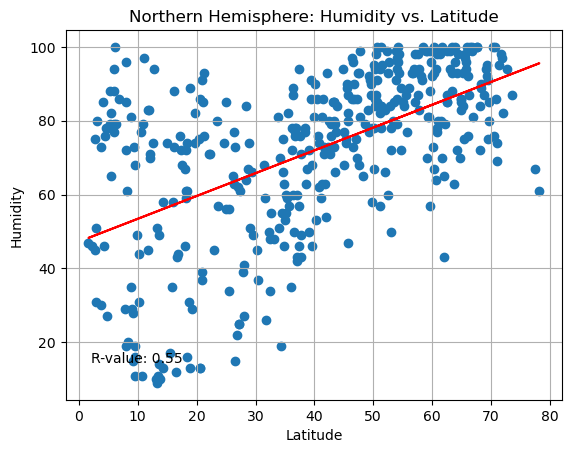

In [15]:
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


#Display
plt.show()

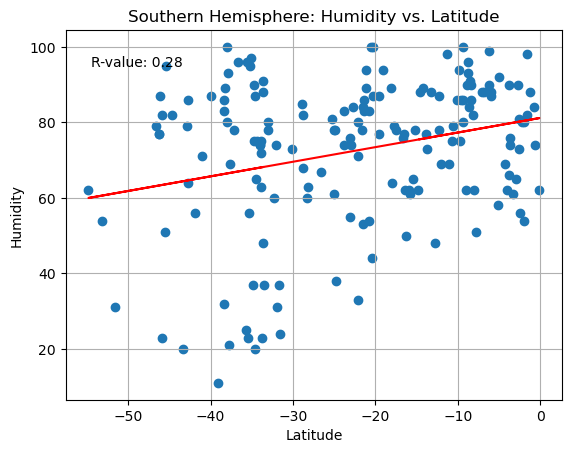

In [16]:
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction is the same in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, indicating that the relationship between humidity and latitude is similar in both hemispheres. In both hemispheres, humidity tends to increase as latitude increases, but the strength of this relationship is stronger in the northern hemisphere than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

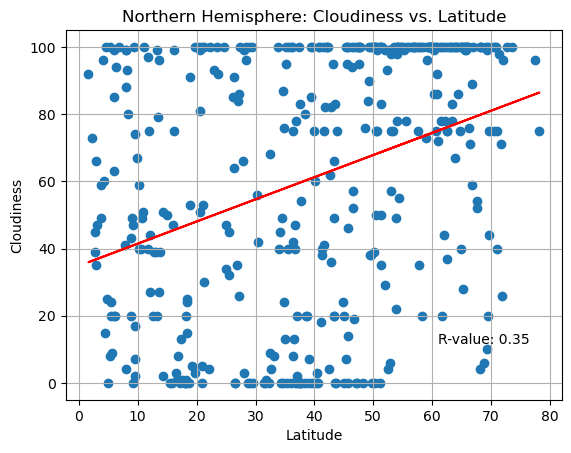

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.75, 0.15), xycoords='axes fraction')


#Display
plt.show()

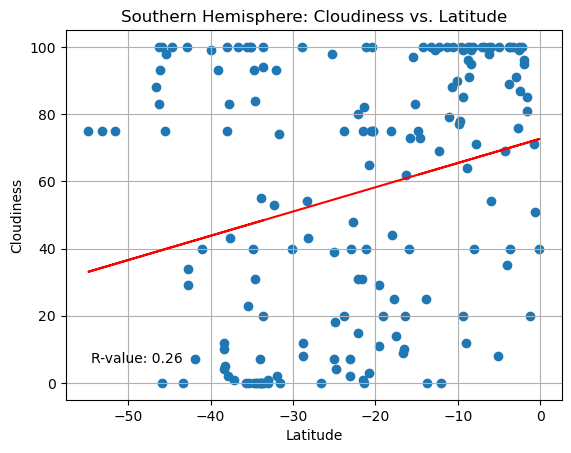

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction and strength are similar in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, and the correlation strength is similar in both hemispheres, indicating that the relationship between cloudiness and latitude is similar in both hemispheres. In both hemispheres, cloudiness tends to increase as latitude increases, but the strength of this relationship is not particularly strong in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

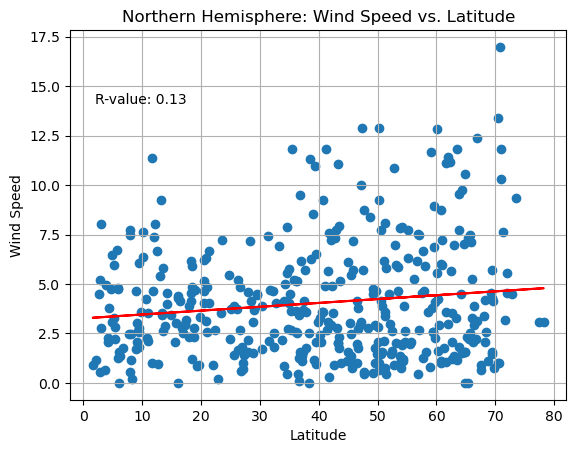

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.8), xycoords='axes fraction')


#Display
plt.show()

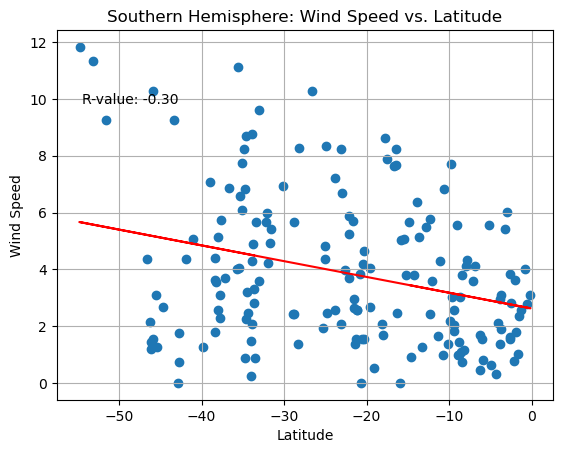

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.8), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** An r-value of -0.27 for southern hemisphere for wind speed vs latitude suggests that there is a weak negative correlation between wind speed and latitude in the southern hemisphere. This means that as latitude increases (moving towards the poles), wind speed tends to decrease.The correlation coefficient is positive in the northern hemisphere indicating a different relationship between wind speed and latitude in the two hemispheres.